# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    # Calculamos el valor de las filas y columnas de la matriz A y calculamos su descomposicion svd.
    m,n = A.shape
    U,S,Vh = svd(A)
    # Construimos la matriz diagonal Sig.
    Sig = np.zeros((m,n)) 
    for i in range(min(m, n)):
        Sig[i, i] = S[i]
    # Calculamos la otra forma de descomponer A.
    C = np.zeros((m,n))
    for i in range(min(m,n)):
        C = C + S[i]*(U[:,i:i+1] @ Vh[i:i+1, :])
    # Retornamos si se cumple o no la igualdad.
    return np.allclose(U @ Sig @ Vh, C)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

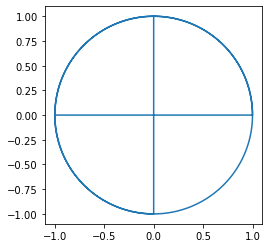

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


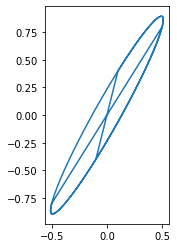

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)

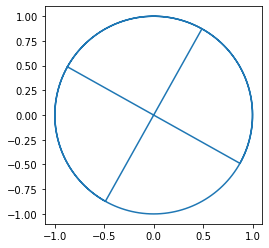

In [11]:
show_circle(u @ circle)

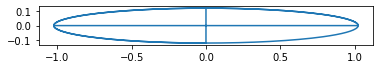

In [12]:
show_circle(np.diag(s) @ circle)

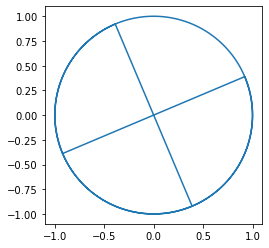

In [13]:
show_circle(vh @ circle)

__Respuesta:__ Podemos notar que al multiplicarle matrices unitarias a la circunferencia unitaria solo vamos a tener un cambio de direccion de los vectores que la componen. En cambio, al multiplicarle una matriz diagonal obtenemos un cambio escalar de uno de los vectores.

__Respuesta:__ La relacion que existe es que si unimos las operaciones realizadas obtendremos la del aplicar el operador lineal A.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

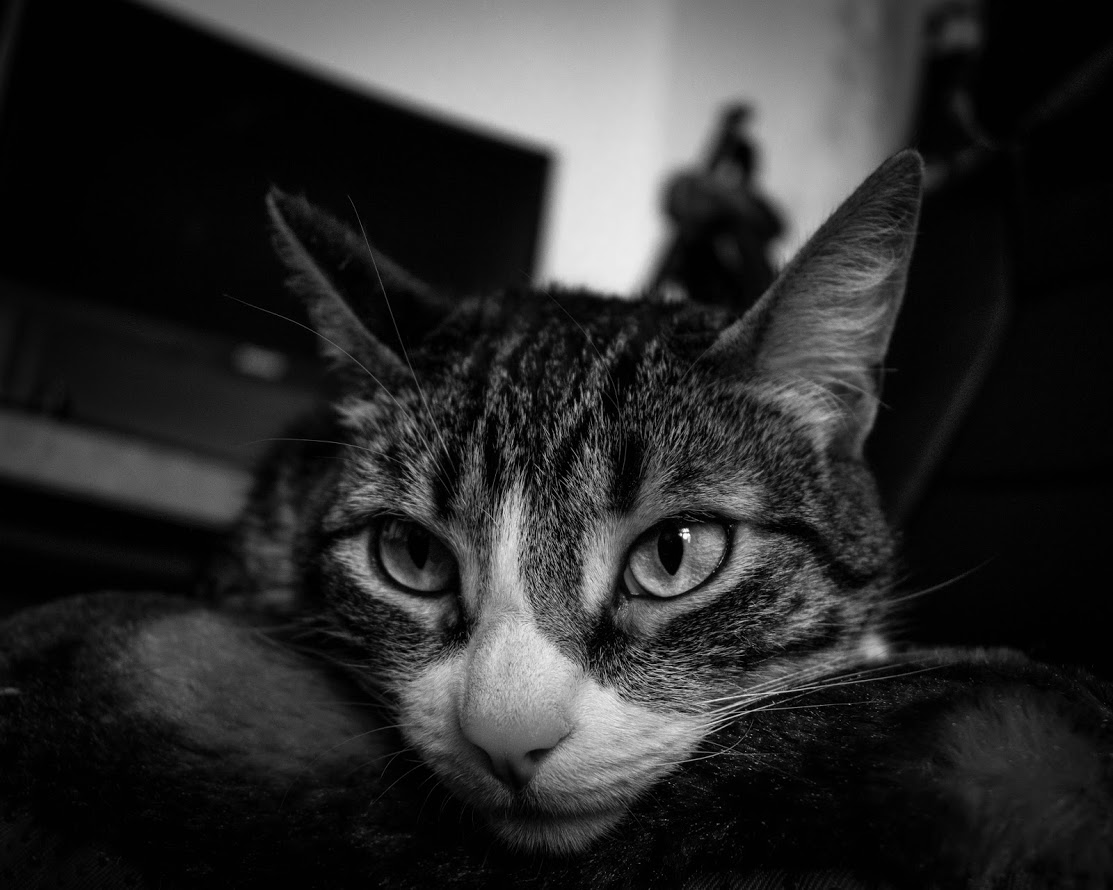

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
def low_rank_svd_approximation(A, l):
    if type(l) != int:
        return print(f"l no valido")
    elif l > np.linalg.matrix_rank(A):
        return print(f"l no valido")
    elif l < 0:
        return print(f"l no valido")
    else: 
        # Calculamos el valor de las filas y columnas de la matriz A y calculamos su descomposicion svd.
        m,n = A.shape
        U,S,Vh = svd(A)
        # Calculamos la otra forma de descomponer A.
        A_aprox = np.zeros((m,n))
        for i in range(0,l+1):
            A_aprox = A_aprox + S[i]*(U[:,i:i+1] @ Vh[i:i+1, :])
        # Imprimimos el error y retornamos la aproximacion.
        print(f"Error de aproximacion: {np.linalg.norm(A-A_aprox, ord = 'fro')}")
        return A_aprox

Error de aproximacion: 15336.332186723579


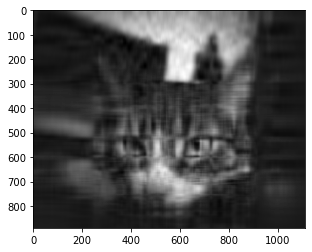

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

Error de aproximacion: 8070.030746363894


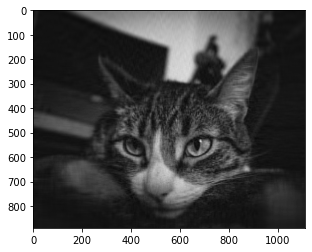

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [20]:
def low_rank_svd_tol_approximation(A, tol):
    # Determinamos el rango de A, su descomposicion svd, unas variables auxiliares y los valores que podria tomar l.
    r = np.linalg.matrix_rank(A)
    U, S, Vh = svd(A)
    aux = 0   
    for l in range(0, r + 1):
        le = l
        # Determinamos el numerador y denominador de la division.
        num = 0
        for i in range(l+1, r+1):
            num = num + S[i-1]**2  
        den = 0
        for i in range(1, r+1):
            den = den + S[i-1]**2
        aux = (num/den)**0.5
        # Determianos l(e) si se cumple que la division es menor a la tolerancia
        if aux <= tol:
            break
    # Utilizamos la funcion anterior para calcular el A aproximado y retornamos lo pedido.    
    print(f"Mayor rango aproximado de A: {l}")
    return low_rank_svd_approximation(A, le)
    

Mayor rango aproximado de A: 64
Error de aproximacion: 7153.205616629275


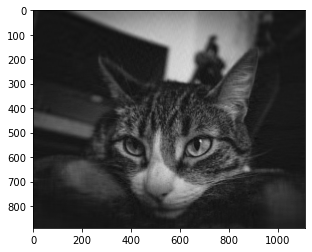

In [21]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

Mayor rango aproximado de A: 457
Error de aproximacion: 717.5883741279104


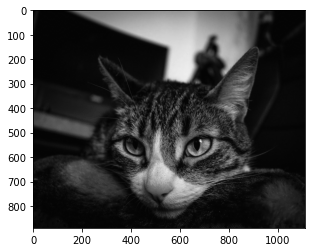

In [22]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

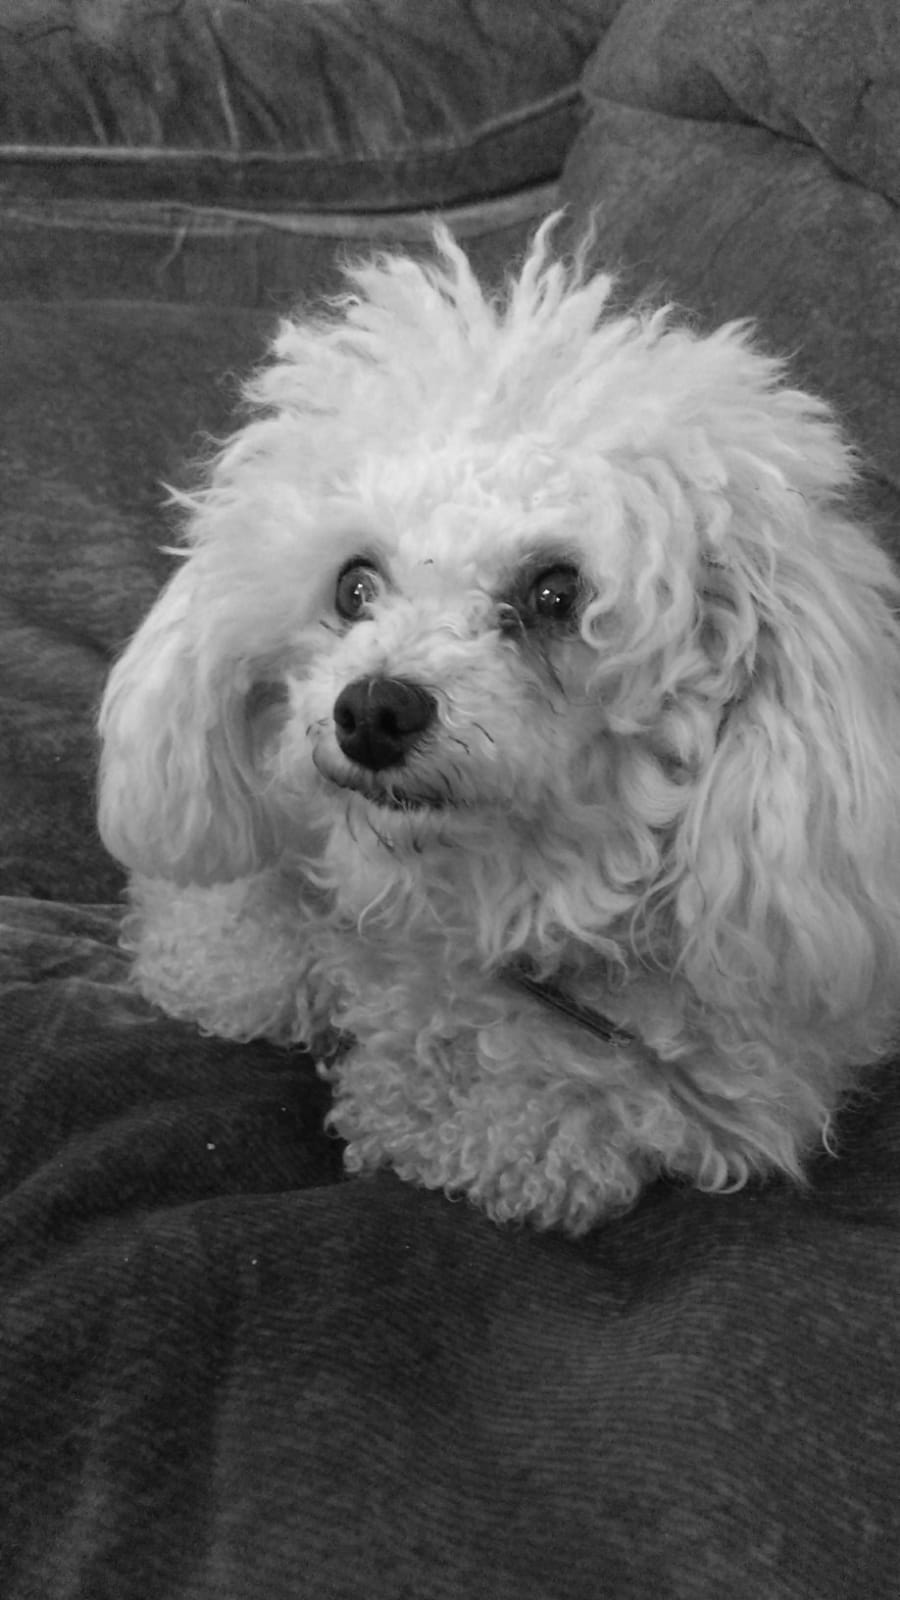

In [23]:
your_img_name = "mi_perra_loca.jpeg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [24]:
your_img_np = np.array(your_img) 

Error de aproximacion: 13418.34640486157


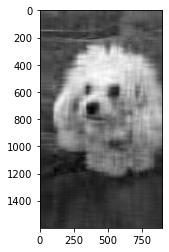

In [25]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

Error de aproximacion: 9839.626586557006


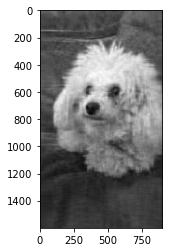

In [26]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

Mayor rango aproximado de A: 12
Error de aproximacion: 12454.869487167718


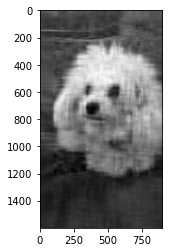

In [27]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

Mayor rango aproximado de A: 227
Error de aproximacion: 1284.17789678548


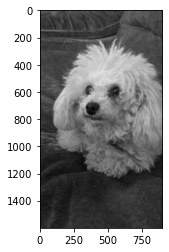

In [28]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Considero que al ser un metodo que aproxima se pierde informacion, en cambio, existen otras manera en las que no se pierde y a mi gusto esa seria mas eficiente.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [29]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [30]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8332.0,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,3943.8
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,NaN


In [31]:
start_date = "2020-10-02"   # FIX ME PLEASE #
end_date = "2020-10-19"
#covid_comunas.info()
#type(start_date.values)
#covid_comunas.iloc[1]

In [32]:
covid_tasa_promedio_nuevos = covid_comunas.dropna(subset = ["codigo_comuna"], axis=0)
#covid_tasa_promedio_nuevos = pd.melt(covid_tasa_promedio_nuevos, id_vars=['region'], value_vars= covid_comunas.loc[:, '2020-10-02':'2020-10-09'].columns, var_name = 'fecha', value_name='casos_totales') 
    
    
    
#covid_tasa_promedio_nuevos = covid_comunas.assign(casos_nuevos = lambda df: df.groupby("region")["comuna"].transform(lambda s: (s - s.mean()) / s.std())
#)
#covid_tasa_promedio_nuevos = (
 #                               #.fillna(0)
    #[['region','comuna','poblacion']]#['comuna'].notnull()
                                #.dropna(subset = ['codigo_comuna']) #.query("comuna != NaN") #.
                                

    # FIX ME PLEASE 
    
#covid_tasa_promedio_nuevos.melt(df, id_vars=['A'], value_vars=['B', 'C'], var_name = 'myVarname', value_name='myValname') 

In [33]:
covid_tasa_promedio_nuevos

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-09-28,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8332.0,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,3943.8
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,2862.8
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0,0.0,0.0,0.0,5.0,6.0,...,3753.0,3824.0,3850.0,3917.0,3951.0,4000.0,4041.0,4126.0,4158.0,3198.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Magallanes,12,Punta Arenas,12101.0,141984.0,29.0,87.0,143.0,203.0,207.0,...,7537.0,8139.0,8695.0,9431.0,9867.0,10160.0,10373.0,10688.0,10826.0,7624.8
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,947.9
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,2.0,9.0,9.0,14.0,16.0,18.0,18.0,18.0,19.0,2790.0
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,8.0,12.0,13.0,13.0,13.0,19.0,19.0,6737.6


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [34]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,745,949,367,728,794,738,737,832,542,343
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,811,1104,907,648,972,932,1046,1044,796,714
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,3547,2605,989,1229,1571,1890,2239,3825,1749,1354
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,861,687,388,319,792,838,1020,939,563,340
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1024,1626,610,823,1008,1128,1057,1026,473,1503


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [35]:
covid_pcr_melt = (    
                    pd.melt(covid_pcr, id_vars=['region'], value_vars= covid_pcr.loc[:, '2020-04-09':].columns, var_name = 'fecha', value_name='nm_pcr') 
                    .astype({"fecha": "datetime64"})
                    .fillna(0)  
)
covid_pcr_melt.head()

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [36]:
covid_casos_melt = (
    pd.melt(covid_comunas, id_vars=['region'], value_vars= covid_comunas.loc[:, '2020-03-30':'2020-10-19'].columns, var_name = 'fecha', value_name='casos_totales') 
    .astype({"fecha": "datetime64"})
    .fillna(0)
)

covid_casos_melt.head()

,region,fecha,casos_totales
0,Arica y Parinacota,2020-03-30,6.0
1,Arica y Parinacota,2020-03-30,0.0
2,Arica y Parinacota,2020-03-30,0.0
3,Arica y Parinacota,2020-03-30,0.0
4,Arica y Parinacota,2020-03-30,0.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [37]:
covid_corr_casos_pcr = (
                        pd.merge(covid_pcr_melt, covid_casos_melt, how='outer', on=['region', 'fecha'])
                        .fillna(0)
                        .ffill(axis=0)
                        .groupby('region')
                        .apply(lambda df: df['nm_pcr'].corr(df['casos_totales']))
                        .sort_values(ascending=False)
    # FIX ME PLEASE #
) 

covid_corr_casos_pcr

region
Biobío                0.412206
Maule                 0.374869
Metropolitana         0.364521
Valparaíso            0.338058
Coquimbo              0.333477
Los Ríos              0.333420
Tarapacá              0.313996
Araucanía             0.281908
Atacama               0.269215
Arica y Parinacota    0.256441
O’Higgins             0.252432
Ñuble                 0.249323
Antofagasta           0.224378
Los Lagos             0.214424
Aysén                 0.201020
Magallanes            0.180804
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Hay relacion entre los pacientes hospitalizados y los pacientes fallecidos?

In [38]:
# FIX ME PLEASE #


covid_fallecidos = https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv
    
covid_hospitalizados = https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto22/HospitalizadosEtario_Acumulado_T.csv

SyntaxError: invalid syntax (<ipython-input-38-3994168b19e2>, line 4)

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Bajo el numero total de contagios una vez aplicada y terminada la cuarentena?

In [41]:
# FIX ME PLEASE #

new_covid_comunas = (
                pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .drop(columns=["codigo_region", "region",  "poblacion", "tasa"])
                .dropna(subset = ['codigo_comuna']) 
                .astype({"codigo_comuna": "int"})
                
)

  
new_covid_comunas = (    
                pd.melt(new_covid_comunas, id_vars=['comuna', 'codigo_comuna'], value_vars= new_covid_comunas.loc[:, '2020-03-30':].columns, var_name = 'fecha', value_name='casos_totales')  
                .fillna(0)  
                .astype({"fecha": "datetime64"})
                
#                .astype({"codigo_comuna": "int"})
                #.groupby(['codigo_comuna', 'comuna'])
                #.agg(suma_casos =("casos_totales", "sum"))
)
new_covid_comunas 



,comuna,codigo_comuna,fecha,casos_totales
0,Arica,15101,2020-03-30,6.0
1,Camarones,15102,2020-03-30,0.0
2,General Lagos,15202,2020-03-30,0.0
3,Putre,15201,2020-03-30,0.0
4,Alto Hospicio,1107,2020-03-30,0.0
...,...,...,...,...
21793,Punta Arenas,12101,2020-10-26,10826.0
21794,Rio Verde,12103,2020-10-26,2.0
21795,San Gregorio,12104,2020-10-26,19.0
21796,Timaukel,12303,2020-10-26,19.0


In [ ]:
new_covid_comunas['codigo_comuna'].unique()

In [42]:
covid_cuarentena =  (
                    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Historicas.csv")
                    .rename(columns=lambda x: x.lower().replace(" ", "_"))
                    .drop(columns=["detalle", "perímetro_en_m", "superficie_en_m2", "estado", "id"])
                    .rename(columns={"nombre": "comuna"})
                    .rename(columns={"código_cut_comuna" : "codigo_comuna"})
                    .astype({"fecha_de_inicio": "datetime64"})
                    .astype({"fecha_de_término": "datetime64"})
                    #.drop_duplicates('codigo_comuna')
                    #.sort_values('codigo_comuna', ascending=False)
)

covid_cuarentena

,comuna,alcance,fecha_de_inicio,fecha_de_término,codigo_comuna
0,Arica,Área Urbana Completa,2020-04-16 22:00:00,2020-05-15 22:00:00,15101
1,Santiago Norte,Sector Específico,2020-04-13 05:00:00,2020-05-05 22:00:00,13101
2,Puente Alto Poniente,Sector Específico,2020-04-09 22:00:00,2020-05-08 22:00:00,13201
3,San Bernardo Nororiente,Sector Específico,2020-04-16 22:00:00,2020-05-08 22:00:00,13401
4,Chillán,Área Urbana Completa,2020-03-30 21:00:00,2020-04-23 22:00:00,16101
5,Osorno,Área Urbana Completa,2020-03-30 21:00:00,2020-04-30 22:00:00,10301
6,Punta Arenas,Área Urbana Completa,2020-04-01 21:00:00,2020-05-07 22:00:00,12101
7,Nueva Imperial,Área Urbana Completa,2020-04-09 22:00:00,2020-04-16 00:00:00,9111
8,Lo Barnechea,Área Urbana Completa,2020-03-26 21:00:00,2020-04-13 05:00:00,13115
9,Vitacura,Comuna completa,2020-03-26 21:00:00,2020-04-13 05:00:00,13132


In [94]:
comunas_cuarentena = new_covid_comunas.loc[lambda df: df['codigo_comuna'] == covid_cuarentena['codigo_comuna'].loc[0]]
for i in range(1, len(covid_cuarentena.values)):
    data_aux = new_covid_comunas.loc[lambda df: df['codigo_comuna'] == covid_cuarentena['codigo_comuna'].loc[i]] 
    comunas_cuarentena = comunas_cuarentena.append(data_aux)
comunas_cuarentena

,comuna,codigo_comuna,fecha,casos_totales
0,Arica,15101,2020-03-30,6.0
346,Arica,15101,2020-04-01,6.0
692,Arica,15101,2020-04-03,12.0
1038,Arica,15101,2020-04-06,41.0
1384,Arica,15101,2020-04-08,63.0
...,...,...,...,...
20143,San Felipe,5701,2020-10-12,1688.0
20489,San Felipe,5701,2020-10-16,1711.0
20835,San Felipe,5701,2020-10-19,1735.0
21181,San Felipe,5701,2020-10-24,1772.0


In [ ]:
for i in range(0, len(covid_cuarentena.values)):
    for j in range(0,len(new_covid_comunas.values)):
        if new_covid_comunas['codigo_comuna'].loc[j] == covid_cuarentena['codigo_comuna'].loc[i]:
            comunas_antes_de_cuarentena = new_covid_comunas.loc[lambda df: df['fecha'] <= covid_cuarentena['fecha_de_inicio'].loc[0]]
            data_aux = new_covid_comunas.loc[lambda df: df['fecha'] == covid_cuarentena['fecha_de_inicio'].loc[i]]
            comunas_antes_de_cuarentena = comunas_antes_de_cuarentena.append(data_aux)
comunas_antes_de_cuarentena = comunas_antes_de_cuarentena.groupby('codigo_comuna')

In [ ]:
for i in range(0, len(covid_cuarentena.values)):
    for j in range(0,len(new_covid_comunas.values)):
        if new_covid_comunas['codigo_comuna'].loc[j] == covid_cuarentena['codigo_comuna'].loc[i]:
            comunas_despues_de_cuarentena = new_covid_comunas.loc[lambda df: df['fecha'] <= covid_cuarentena['fecha_de_inicio'].loc[0]]
            data_aux = new_covid_comunas.loc[lambda df: df['fecha'] == covid_cuarentena['fecha_de_inicio'].loc[i]]
            comunas_despues_de_cuarentena = comunas_antes_de_cuarentena.append(data_aux)
comunas_despues_de_cuarentena.head()

In [39]:
covid_analisis = ( 
                  pd.merge(covid_cuarentena, covid_comunas, how='right', on=['comuna', 'codigo_comuna'])
                  .fillna(0)
              #          .ffill(axis=0)
               #         .groupby('region')
                #        .apply(lambda df: df['nm_pcr'].corr(df['casos_totales']))
                 #       .sort_values(ascending=False)
    # FIX ME PLEASE #
) 

covid_analisis

NameError: name 'covid_cuarentena' is not defined

__Respuesta:__